In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:

from google.colab import drive
drive.mount("/content/drive")

ModuleNotFoundError: No module named 'google'

In [ ]:
path = "/content/drive/MyDrive/PHYS 4450L/pNMR/pNMR 1.27 T2 data/"
filename = "pulsetime50_waittime20.csv"

data = pd.read_csv(path+filename)

In [ ]:
data = pd.read_csv("pNMR_1.27_T2_data/pulsetime50_waittime20.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'pNMR 1.27 T2 data/pulsetime50_waittime20.csv'

In [6]:
print(data)

NameError: name 'data' is not defined

In [7]:
t = data[data.columns[0]]
t_shift = -1*t[0]
t = t + t_shift
t = t*1000
t = np.array(t)
#print(t)
channel_1 = data[data.columns[1]]
channel_1 = np.array(channel_1)
#print(channel_1)
plt.plot(t, channel_1)
plt.xlabel("Time (ms)")
plt.ylabel("V")
plt.show()

NameError: name 'data' is not defined

In [8]:
def find_max(signal,times, min_time):
  #signal is input channel data
  #times is time array
  #min_time is in ms, the cutoff for where we want to start collecting data

  t_adjusted = np.where(times >= min_time, times, times*0)
  #print(t_adjusted)
  signal_adjusted = np.where(times >= min_time, signal, signal*0)
  #print(signal_adjusted)

  max_val = np.max(signal_adjusted)
  #plt.plot(t_adjusted,signal_adjusted)
  #plt.show()
  return(max_val)



In [9]:
def find_pulse_end(signal, threshold_max, threshold_min):
  trigger = False
  for i in range(len(signal)):
    if (signal[i] > threshold_max):
      trigger = True
    if (trigger == True and signal[i] < threshold_min):
      return(i)
  return(0)


In [10]:
def chop_signal(signal, start):
  return(signal[start:])

In [11]:
#Testing outputs at different times
#Note that one shouldn't really use the adjusted arrays, but it does extract the correct value, given a proper cutoff time.

find_max(channel_1,t,1)
find_max(channel_1,t,2)
find_max(channel_1,t,4)
find_max(channel_1,t,4.5)

NameError: name 'channel_1' is not defined

In [12]:
pulse_time = .1 #constant 50us pulse time always
buffer_time = .5 #buffer to move beyond second pulse
wait_time = 20/2 #.5 * the time that we specify since it is after a 90 degree pulse

#Extract when pulse sequence begins
start_index = list(x > 1 for x in channel_1).index(True)
start_time = t[start_index]
print(start_time)

#Determine approx. start time (there may be some error associated with this.)
#Hope that we don't cut off our spin echo's amplitude (fingers crossed)

min_time = start_time + pulse_time + buffer_time+wait_time
print(find_max(channel_1,t,min_time))


NameError: name 'channel_1' is not defined

And the answer seems to match. Now, I'll try to iterate quickly over everything, and see if there is some strong error if there's a significant outlier.

In [ ]:
wait_times = [5,6,7,8,9,10,
              12,14,15,16,18,20,
              22,24,25,26,28,30,
              32,34,36,38,40
              ]
amplitudes = np.zeros(len(wait_times))

for i in range(len(wait_times)):
  f_name = "pulsetime50_waittime"+str(wait_times[i])+".csv"

  temp_data = pd.read_csv(path+f_name)

  t = temp_data[temp_data.columns[0]]
  t_shift = -1*t[0]
  t = t + t_shift
  t = t*1000
  t = np.array(t)
  #print(t)
  signal = temp_data[temp_data.columns[1]]
  signal = np.array(signal)

  p_time = .05 #constant 50us pulse time always
  b_time = .2 #buffer to move beyond second pulse
  w_time = wait_times[i]/2
  start_i = list(x > 1 for x in channel_1).index(True)
  s_time = t[start_index]
  min_time = s_time + p_time + b_time+w_time

  amplitudes[i] = find_max(signal=signal,times=t,min_time=min_time)

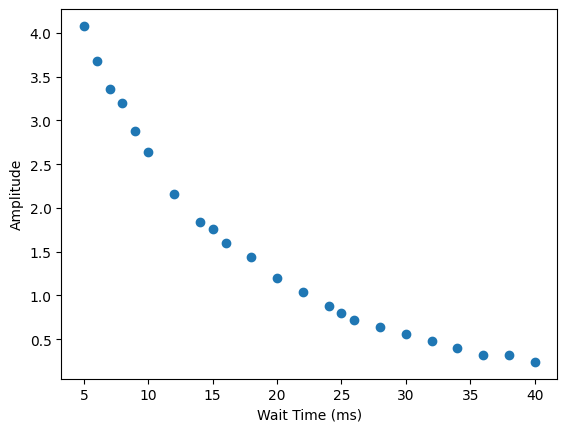

In [ ]:
plt.scatter(wait_times,amplitudes)
plt.xlabel("Wait Time (ms)")
plt.ylabel("Amplitude")
plt.show()

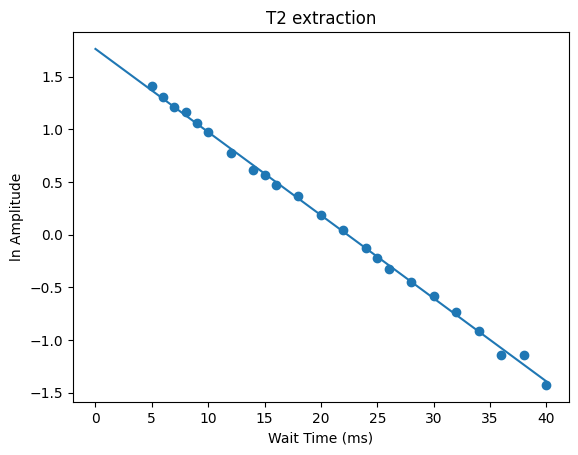

In [ ]:
#Fitting to an exponential
# we have y(t) = A exp(-t/T2)
# => that ln y = const. - t/T2
# so slope of line = -1/T2

linearized_amplitudes = np.log(amplitudes)
m, b = np.polyfit(wait_times, linearized_amplitudes, 1)

plt.scatter(wait_times,linearized_amplitudes)
xxx = np.linspace(0,40,100)
plt.plot(xxx,m*xxx+b)
plt.xlabel("Wait Time (ms)")
plt.ylabel("ln Amplitude")
plt.title("T2 extraction")
plt.show()

In [ ]:
print(f"T2 (ms): {-1/m}")

T2 (ms): 12.67760439421316


[10.0, 12.5, 20.0, 22.5, 25.0, 27.5, 30.0, 32.5, 37.5, 40.0, 42.5, 47.5, 52.5, 55.0, 57.5, 60.0]


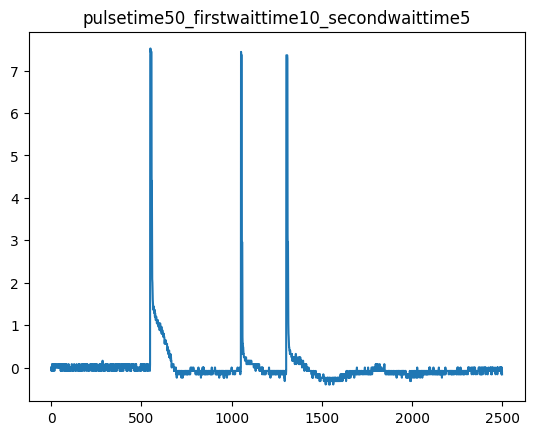

[0.24 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.  ]


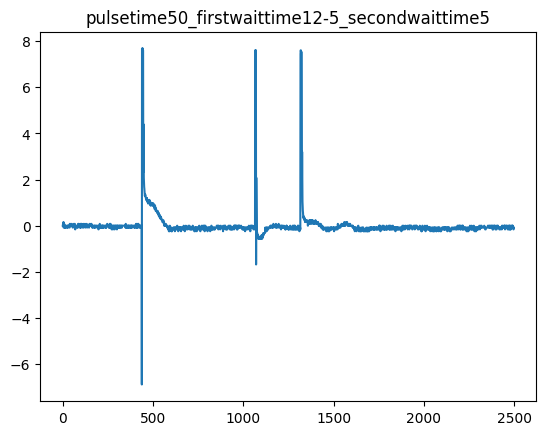

[0.24 0.24 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.  ]


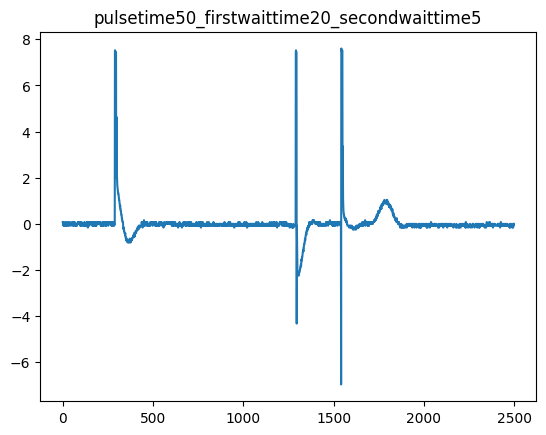

[0.24 0.24 1.04 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.  ]


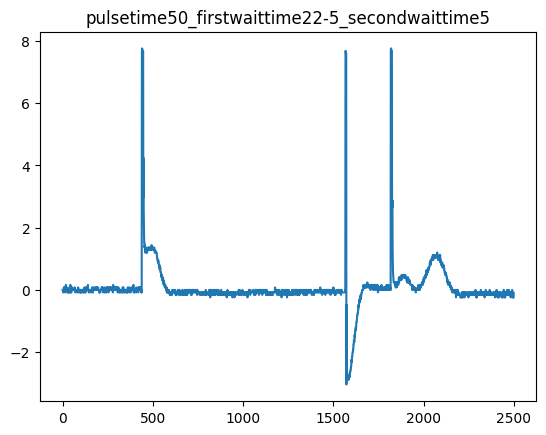

[0.24 0.24 1.04 1.2  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.  ]


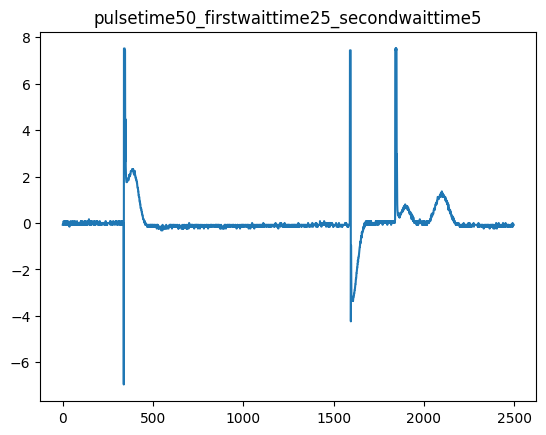

[0.24 0.24 1.04 1.2  1.36 0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.  ]


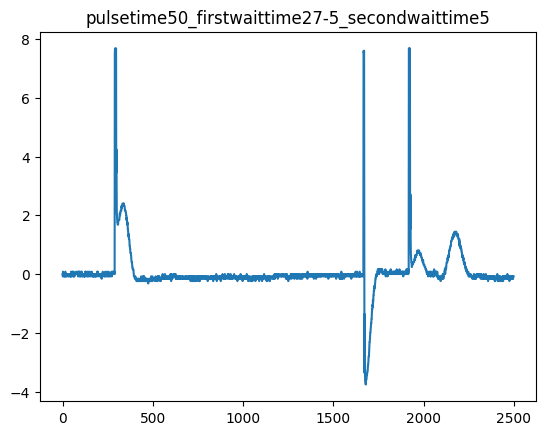

[0.24 0.24 1.04 1.2  1.36 1.44 0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.  ]


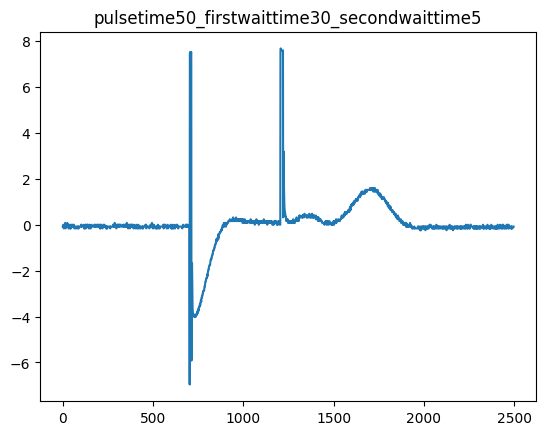

[0.24 0.24 1.04 1.2  1.36 1.44 1.6  0.   0.   0.   0.   0.   0.   0.
 0.   0.  ]


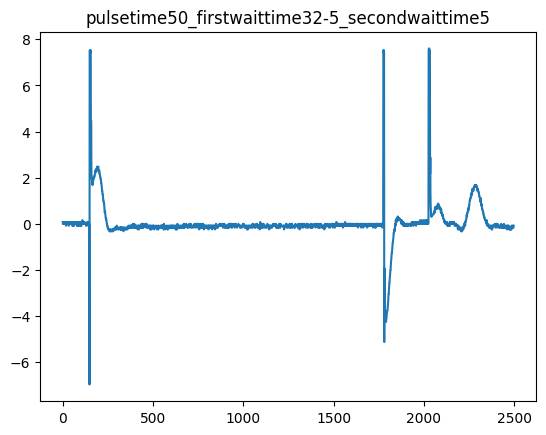

[0.24 0.24 1.04 1.2  1.36 1.44 1.6  1.68 0.   0.   0.   0.   0.   0.
 0.   0.  ]


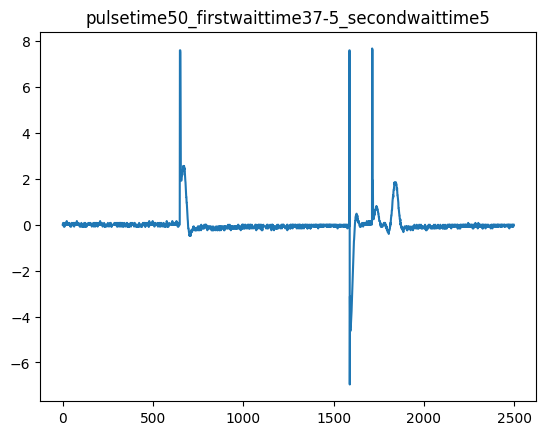

[0.24 0.24 1.04 1.2  1.36 1.44 1.6  1.68 1.84 0.   0.   0.   0.   0.
 0.   0.  ]


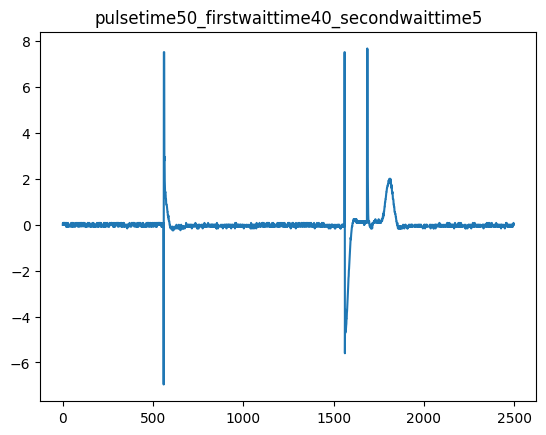

[0.24 0.24 1.04 1.2  1.36 1.44 1.6  1.68 1.84 2.   0.   0.   0.   0.
 0.   0.  ]


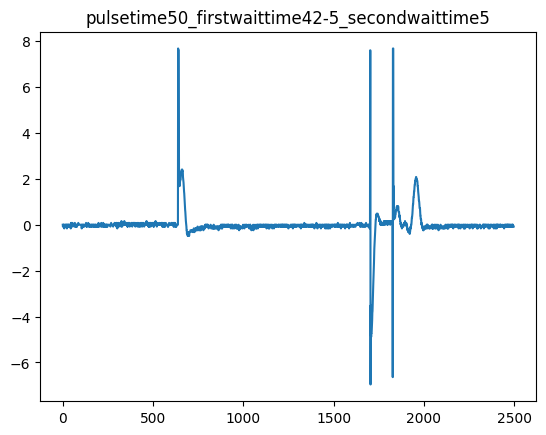

[0.24 0.24 1.04 1.2  1.36 1.44 1.6  1.68 1.84 2.   2.08 0.   0.   0.
 0.   0.  ]


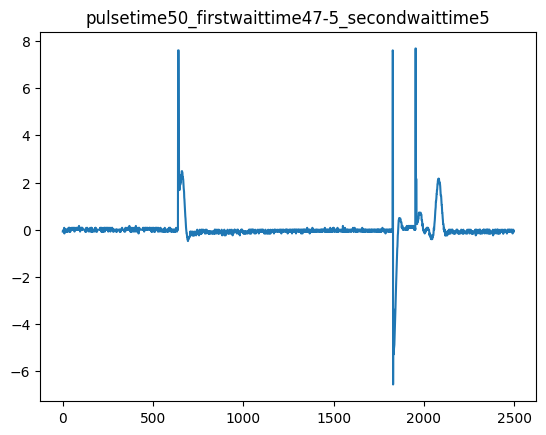

[0.24 0.24 1.04 1.2  1.36 1.44 1.6  1.68 1.84 2.   2.08 2.16 0.   0.
 0.   0.  ]


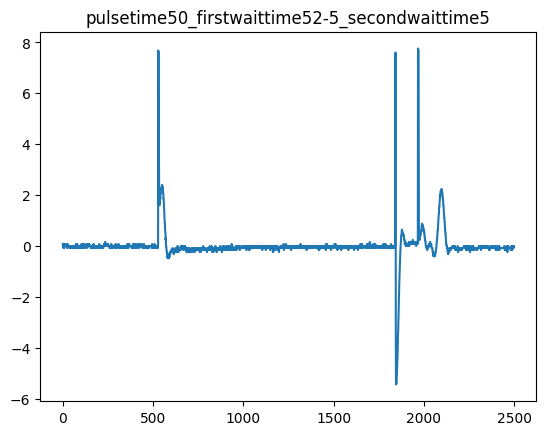

[0.24 0.24 1.04 1.2  1.36 1.44 1.6  1.68 1.84 2.   2.08 2.16 2.24 0.
 0.   0.  ]


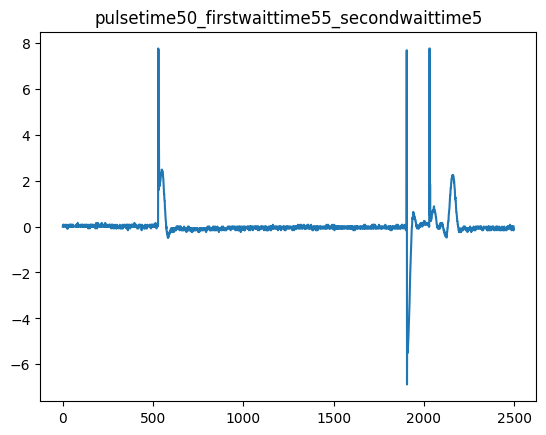

[0.24 0.24 1.04 1.2  1.36 1.44 1.6  1.68 1.84 2.   2.08 2.16 2.24 2.24
 0.   0.  ]


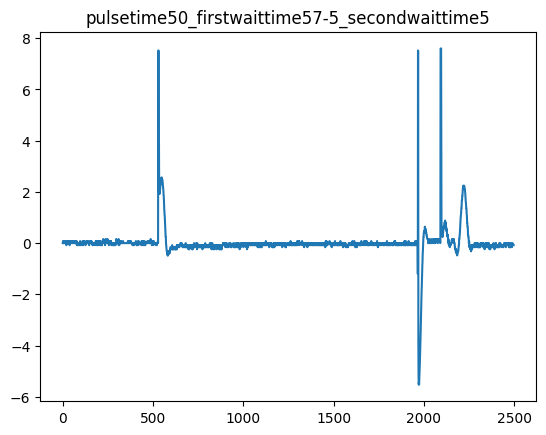

[0.24 0.24 1.04 1.2  1.36 1.44 1.6  1.68 1.84 2.   2.08 2.16 2.24 2.24
 2.24 0.  ]


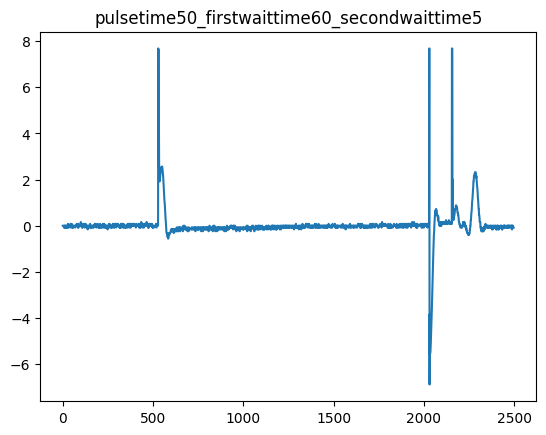

[0.24 0.24 1.04 1.2  1.36 1.44 1.6  1.68 1.84 2.   2.08 2.16 2.24 2.24
 2.24 2.32]


In [7]:
#Now try for T1 data
path_t1 = "/content/drive/MyDrive/PHYS 4450L/pNMR/pNMR 1.29 T1 data/"
first_w_t_array = [10.,  12.5, 20.,  22.5, 25.,  27.5, 30.,  32.5,  37.5, 40.,  42.5,  47.5,  52.5, 55.,  57.5, 60. ]
print(first_w_t_array)

amplitudes_t1 = np.zeros(len(first_w_t_array))

for i in range(len(first_w_t_array)):
  wait_time_name = ""
  if (first_w_t_array[i]%1!=0):
    whole = int(first_w_t_array[i]//1)
    fraction = 5
    wait_time_name = str(whole)+"-"+str(fraction)
  else:
    wait_time_name = str(int(first_w_t_array[i]))

  f_name = "pulsetime50_firstwaittime"+wait_time_name+"_secondwaittime5"
  #print(f_name)
  t1_data = pd.read_csv(path_t1+f_name+".csv")
  #print(t1_data)
  signal_t1 = t1_data[t1_data.columns[1]]
  signal_t1 = np.array(signal_t1)
  #print(signal_t1)

  plt.plot(signal_t1)
  plt.title(f_name)
  plt.show()

  for j in range(3): # Renamed loop variable from i to j
    index = find_pulse_end(signal=signal_t1, threshold_max=6, threshold_min=.5)
    signal_t1 = chop_signal(signal=signal_t1, start=index+50)

  amplitudes_t1[i] = np.max(signal_t1)
  print(amplitudes_t1)

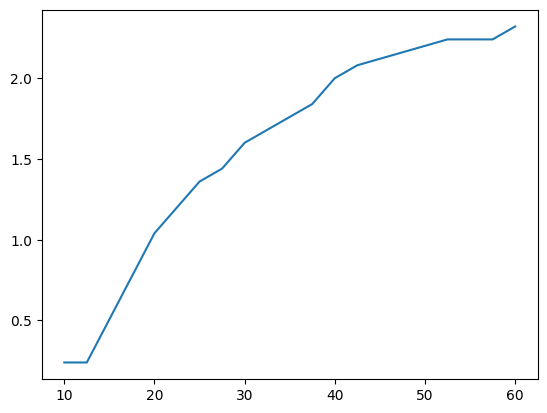

2.32


In [8]:
plt.plot(first_w_t_array, amplitudes_t1)
plt.show()
print(np.max(amplitudes_t1))

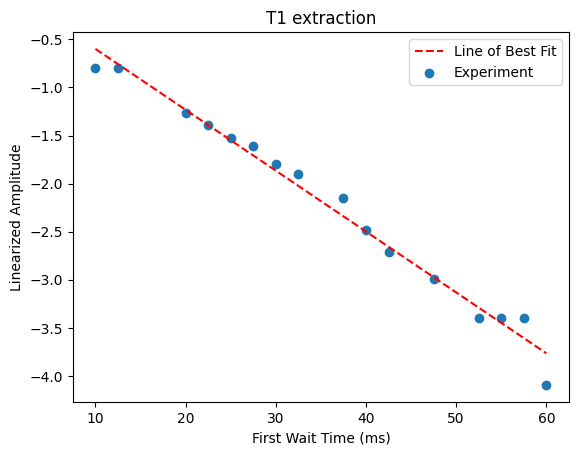

In [12]:
linearized_t1_amp = np.log(.5-.5*amplitudes_t1/2.4)
#print(linearized_t1_amp)

m1, b1 = np.polyfit(first_w_t_array, linearized_t1_amp, 1)

XX = np.linspace(10,60,1000)
plt.plot(XX,m1*XX+b1, color='red', linestyle="--", label="Line of Best Fit")
plt.scatter(first_w_t_array, linearized_t1_amp, label="Experiment")
plt.legend()
plt.xlabel("First Wait Time (ms)")
plt.ylabel("Linearized Amplitude")
plt.title("T1 extraction")
plt.show()

In [13]:
print(-1/m1)
print(m1)

15.79046058495549
-0.06332937501219942
